In [ ]:
# !pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
# import nltk  # Import pustaka NLTK (Natural Language Toolkit).
# nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
# nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

In [ ]:
# Text Preprocessing & Cleaning
import re
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Imbalanced
from sklearn.metrics import accuracy_score # Evaluation

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px

# Memuat Dataset Hasil Scrapping Dari Gdrive

In [ ]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?id=19BJFUc1uY0n2LAP2dNdmHsNPFEEKeoev')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,28be6724-6ea4-40ef-8f49-2a899231b8e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nonton muter muter aja padahal udah berlanggan...,2,62,6.31.6-28fdf7527f,2024-07-05 14:40:44,Haloo Kak!! Terima kasih telah menggunakan Vid...,2024-07-05 15:19:45,6.31.6-28fdf7527f
1,d77c731b-ea2d-432c-87cf-0b7ab90113e7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,247,6.31.6-28fdf7527f,2024-07-01 16:03:49,"Hallo, Kak Airlangga. Mohon maaf atas ketidakn...",2024-07-01 16:03:59,6.31.6-28fdf7527f
2,c34cdf0f-f324-48c0-a553-46a337120fba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,233,6.31.6-28fdf7527f,2024-07-07 09:36:29,"Hai Kak, terkait kendala tersebut, silakan kir...",2024-07-07 09:45:40,6.31.6-28fdf7527f
3,1ef053af-9562-4aaf-a2ba-c1ef341eb646,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,26,6.32.10-952accb282,2024-07-15 00:05:07,"Hai kak Nugroho, terima kasih sudah memberikan...",2024-07-15 07:22:04,6.32.10-952accb282
4,3494802d-6b4e-4e44-8115-c70b4eb9ca54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sampai saat ini platform ini adalah penyedia s...,4,615,6.30.10-cf0f3fedef,2024-06-22 02:40:33,Hai kak Petrus. Terima kasih sudah memberikan ...,2024-06-22 04:11:19,6.30.10-cf0f3fedef


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177411 entries, 0 to 177410
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              177411 non-null  object
 1   userName              177411 non-null  object
 2   userImage             177411 non-null  object
 3   content               177388 non-null  object
 4   score                 177411 non-null  int64 
 5   thumbsUpCount         177411 non-null  int64 
 6   reviewCreatedVersion  118951 non-null  object
 7   at                    177411 non-null  object
 8   replyContent          154012 non-null  object
 9   repliedAt             154012 non-null  object
 10  appVersion            118951 non-null  object
dtypes: int64(2), object(9)
memory usage: 14.9+ MB


**Data Explanation :**

Data yang di peroleh dari hasil scarpping **Aplikasi Vidio** berjumlah **177.411 baris dan 11 kolom** yang diantara kolomnya itu adalah :

* reviewId : reviewId ini berisikan informasi lengkap tentang riview itu sendiri
* userName : kolom ini ber-isikan nama yang memberikan review pada aplikasi
* userImage : kolom ini ber-isikan foto yang memberikan review pada aplikasi
* content : kolom ini ber-isikan isi content review dari setiap pengguna
* score : kolom ini adalah rating bintang yang diberikan pengguna pada aplikasi (1 - 5)
* thumbsUpCount : kolom ini adalah jumlah like yang mendukung dari content riview pengguna lain
* reviewCreatedVersion : kolom ini ber-isikan versi aplikasi yang digunakan pada pengguna
* at : kolom ini ber-isikan tanggal dari pelanggan yang memberikan komentar pada aplikasi
* replyContent : kolom ini ber-isikan isi content balasan dari admin aplikasi
* repliedAt : kolom ini ber-isikan tanggal dari admin aplikasi yang memberikan komentar balik terhadap komentar pengguna
* appVersion : pada kolom ini ber isikan versi aplikasi yang digunakan oleh pengguna

## Data Cleaning

reviewId                    0
userName                    0
userImage                   0
content                    23
score                       0
thumbsUpCount               0
reviewCreatedVersion    58460
at                          0
replyContent            23399
repliedAt               23399
appVersion              58460
dtype: int64
reviewId                 0.000000
userName                 0.000000
userImage                0.000000
content                  0.012964
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion    32.951734
at                       0.000000
replyContent            13.189148
repliedAt               13.189148
appVersion              32.951734
dtype: float64


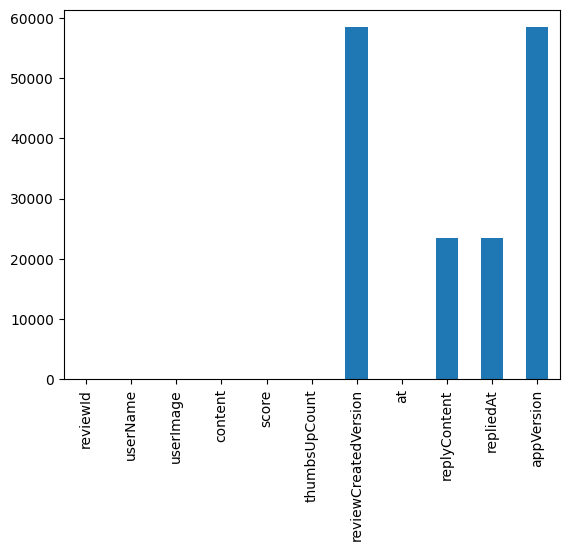

In [ ]:
import matplotlib.pyplot as plt

df.isna().sum().plot(kind="bar");
missing_values_sum = df.isna().sum()
print(missing_values_sum)
missing_values_percent = df.isna().mean()*100
print(missing_values_percent)

In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari dataset
clean_df = df.dropna()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64
reviewId                0.0
userName                0.0
userImage               0.0
content                 0.0
score                   0.0
thumbsUpCount           0.0
reviewCreatedVersion    0.0
at                      0.0
replyContent            0.0
repliedAt               0.0
appVersion              0.0
dtype: float64


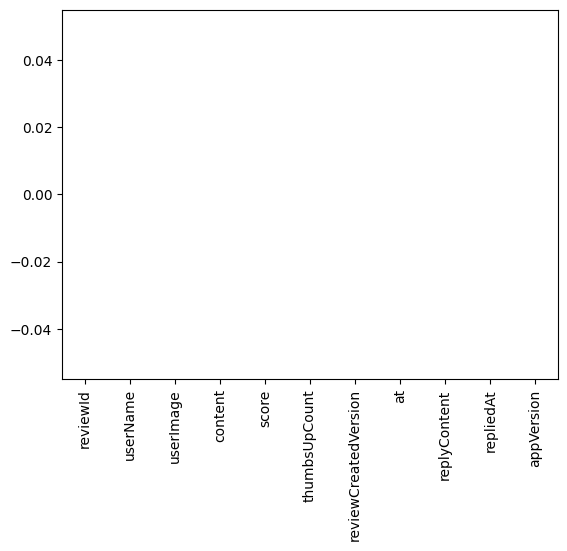

In [ ]:
# Visualisasi setelah menghapus baris yang memiliki nilai yang hilang (NaN)

clean_df.isna().sum().plot(kind="bar");
missing_values_sum = clean_df.isna().sum()
print(missing_values_sum)
missing_values_percent = clean_df.isna().mean()*100
print(missing_values_percent)

In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107864 entries, 0 to 148248
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              107864 non-null  object
 1   userName              107864 non-null  object
 2   userImage             107864 non-null  object
 3   content               107864 non-null  object
 4   score                 107864 non-null  int64 
 5   thumbsUpCount         107864 non-null  int64 
 6   reviewCreatedVersion  107864 non-null  object
 7   at                    107864 non-null  object
 8   replyContent          107864 non-null  object
 9   repliedAt             107864 non-null  object
 10  appVersion            107864 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.9+ MB


**Data Explanation :**

Jadi, data yang di peroleh setelah *data cleaning* dan akan diolah untuk *sentiment analysis* dari **Aplikasi Vidio** yakni berjumlah **107.864 baris**

## EDA (Exploratory Data Analysis)

In [ ]:
# Menghapus kolom yang tidak digunakan untuk eksplorasi
clean_df.drop(columns=['userImage','reviewCreatedVersion','repliedAt'], inplace=True)

In [ ]:
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,at,replyContent,appVersion
0,28be6724-6ea4-40ef-8f49-2a899231b8e3,Pengguna Google,Nonton muter muter aja padahal udah berlanggan...,2,62,2024-07-05 14:40:44,Haloo Kak!! Terima kasih telah menggunakan Vid...,6.31.6-28fdf7527f
1,d77c731b-ea2d-432c-87cf-0b7ab90113e7,Pengguna Google,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,247,2024-07-01 16:03:49,"Hallo, Kak Airlangga. Mohon maaf atas ketidakn...",6.31.6-28fdf7527f
2,c34cdf0f-f324-48c0-a553-46a337120fba,Pengguna Google,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,233,2024-07-07 09:36:29,"Hai Kak, terkait kendala tersebut, silakan kir...",6.31.6-28fdf7527f
3,1ef053af-9562-4aaf-a2ba-c1ef341eb646,Pengguna Google,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,26,2024-07-15 00:05:07,"Hai kak Nugroho, terima kasih sudah memberikan...",6.32.10-952accb282
4,3494802d-6b4e-4e44-8115-c70b4eb9ca54,Pengguna Google,Sampai saat ini platform ini adalah penyedia s...,4,615,2024-06-22 02:40:33,Hai kak Petrus. Terima kasih sudah memberikan ...,6.30.10-cf0f3fedef


In [ ]:
# Mengubah 'at' ke format tanggal saat ini, lalu ambil jam dan menit.
clean_df['at'] = pd.to_datetime(clean_df['at'])
clean_df['date'] = clean_df['at'].dt.strftime("%Y-%m-%d")
clean_df.drop(columns=['at'], inplace=True)
clean_df['date'] = pd.to_datetime(clean_df['date'])
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,replyContent,appVersion,date
0,28be6724-6ea4-40ef-8f49-2a899231b8e3,Pengguna Google,Nonton muter muter aja padahal udah berlanggan...,2,62,Haloo Kak!! Terima kasih telah menggunakan Vid...,6.31.6-28fdf7527f,2024-07-05
1,d77c731b-ea2d-432c-87cf-0b7ab90113e7,Pengguna Google,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,247,"Hallo, Kak Airlangga. Mohon maaf atas ketidakn...",6.31.6-28fdf7527f,2024-07-01
2,c34cdf0f-f324-48c0-a553-46a337120fba,Pengguna Google,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,233,"Hai Kak, terkait kendala tersebut, silakan kir...",6.31.6-28fdf7527f,2024-07-07
3,1ef053af-9562-4aaf-a2ba-c1ef341eb646,Pengguna Google,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,26,"Hai kak Nugroho, terima kasih sudah memberikan...",6.32.10-952accb282,2024-07-15
4,3494802d-6b4e-4e44-8115-c70b4eb9ca54,Pengguna Google,Sampai saat ini platform ini adalah penyedia s...,4,615,Hai kak Petrus. Terima kasih sudah memberikan ...,6.30.10-cf0f3fedef,2024-06-22


In [ ]:
# Fungsi untuk membulatkan versi aplikasi
def round_version(version):
    return version.split('-')[0]

# Mengaplikasikan fungsi ke kolom 'appVersion'
clean_df['appVersion'] = clean_df['appVersion'].apply(round_version)
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,replyContent,appVersion,date
0,28be6724-6ea4-40ef-8f49-2a899231b8e3,Pengguna Google,Nonton muter muter aja padahal udah berlanggan...,2,62,Haloo Kak!! Terima kasih telah menggunakan Vid...,6.31.6,2024-07-05
1,d77c731b-ea2d-432c-87cf-0b7ab90113e7,Pengguna Google,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,247,"Hallo, Kak Airlangga. Mohon maaf atas ketidakn...",6.31.6,2024-07-01
2,c34cdf0f-f324-48c0-a553-46a337120fba,Pengguna Google,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,233,"Hai Kak, terkait kendala tersebut, silakan kir...",6.31.6,2024-07-07
3,1ef053af-9562-4aaf-a2ba-c1ef341eb646,Pengguna Google,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,26,"Hai kak Nugroho, terima kasih sudah memberikan...",6.32.10,2024-07-15
4,3494802d-6b4e-4e44-8115-c70b4eb9ca54,Pengguna Google,Sampai saat ini platform ini adalah penyedia s...,4,615,Hai kak Petrus. Terima kasih sudah memberikan ...,6.30.10,2024-06-22


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107864 entries, 0 to 148248
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   reviewId       107864 non-null  object        
 1   userName       107864 non-null  object        
 2   content        107864 non-null  object        
 3   score          107864 non-null  int64         
 4   thumbsUpCount  107864 non-null  int64         
 5   replyContent   107864 non-null  object        
 6   appVersion     107864 non-null  object        
 7   date           107864 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.4+ MB


In [ ]:
import plotly.express as px

# Ekstrak tahun dari kolom 'date' dan tambahkan sebagai kolom baru
clean_df['year'] = clean_df['date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung jumlah ulasan
yearly_review_counts = clean_df.groupby('year').size().reset_index(name='count')

# Membuat bar chart dengan Plotly Express
fig = px.bar(yearly_review_counts, x='year', y='count',
             title='Jumlah Ulasan Berdasarkan Tahun',
             labels={'year': 'Tahun', 'count': 'Jumlah Ulasan'})

# Menampilkan plot
fig.show()

In [ ]:
# Tambahkan kolom 'year' dari kolom 'date'
clean_df['year'] = clean_df['date'].dt.year

# Mengelompokkan berdasarkan 'year' dan menghitung rata-rata 'score'
yearly_data = clean_df.groupby(['year'])['score'].mean().reset_index()

# Membuat plot menggunakan Plotly Express
fig = px.line(yearly_data, x="year", y="score",
              title='Rata-Rata Rating per Tahun',
              labels={'year': 'Tahun', 'score': 'Rating'})
fig.show()

In [ ]:
import plotly.express as px

# Mengelompokkan data dan menghitung ukuran setiap kelompok
result = clean_df.groupby(['score']).size().reset_index(name='count')

# Membuat bar chart dengan Plotly Express
fig = px.bar(result, x='score', y='count',
             title='Distribusi Jumlah Ulasan Berdasarkan Rating',
             labels={'score': 'Rating', 'count': 'Jumlah Ulasan'},
             color_continuous_scale='Blues')

# Menampilkan plot
fig.show()

In [ ]:
clean_df['score'].value_counts()

score
5    55775
1    27588
4    10577
3     8082
2     5842
Name: count, dtype: int64

# Pra-Pemrosesan

In [ ]:
# Memilih kolom 'content' dan 'score' dari DataFrame clean_df
# Membuat salinan eksplisit dari subset DataFrame
reviews = clean_df[['content', 'score']].copy()

In [ ]:
reviews.head()

,content,score
0,Nonton muter muter aja padahal udah berlanggan...,2
1,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1
2,Ini Vidio lagi kenapa sih? Udah sering berlang...,1
3,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5
4,Sampai saat ini platform ini adalah penyedia s...,4


In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Menghapus sebutan (mention)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Menghapus tagar (hashtag)
    text = re.sub(r"http\S+", '', text)  # Menghapus tautan
    text = re.sub(r'[0-9]+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Menghapus karakter non-ASCII


    text = text.replace('\n', ' ')  # Mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus semua tanda baca
    text = text.strip()  # Menghapus spasi di awal dan akhir teks
    return text

def casefoldingText(text):  # Mengubah semua huruf dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text):  # Memecah teks menjadi daftar kata
    text = word_tokenize(text)
    return text

def filteringText(text):  # Menghapus kata-kata berhenti dari teks
    # Mendapatkan stopword dari NLTK untuk bahasa Indonesia
    listStopwords = set(stopwords.words('indonesian'))
    # Mendapatkan stopword dari NLTK untuk bahasa Inggris
    listStopwords1 = set(stopwords.words('english'))
    # Menggabungkan semua stopword
    listStopwords.update(listStopwords1)
    # Menambahkan stopword tambahan jika diperlukan
    listStopwords.update(['ny','gk','apk','vidio','iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy', 'anjing', 'babi', 'tolol', 'kontol', 'tai', 'tahi', 'aplikasi'])

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):  # Mengembalikan kata-kata ke bentuk dasarnya
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()  # Memecah teks menjadi daftar kata
    stemmed_words = [stemmer.stem(word) for word in words]  # Menerapkan stemming pada setiap kata
    stemmed_text = ' '.join(stemmed_words)  # Menggabungkan kata-kata yang telah distem
    return stemmed_text

def toSentence(list_words):  # Menggabungkan daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "bertahuntahun": "tahunan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "apk": "aplikasi", "ok ok": "oke", "bagus bagu": "bagus", "bagu": "bagus", "mengecewakan": "bikin kecewa", "potong": "gagal", "mantap": "bagus", "ok": "oke"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
reviews['text_clean'] = reviews['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
reviews['text_casefoldingText'] = reviews['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
reviews['text_slangwords'] = reviews['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
reviews['text_tokenizingText'] = reviews['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
reviews['text_stopword'] = reviews['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
reviews['text_akhir'] = reviews['text_stopword'].apply(toSentence)

In [ ]:
reviews.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Nonton muter muter aja padahal udah berlanggan...,2,Nonton muter muter aja padahal udah berlanggan...,nonton muter muter aja padahal udah berlanggan...,nonton muter muter saja padahal sudah berlangg...,"[nonton, muter, muter, saja, padahal, sudah, b...","[nonton, muter, muter, berlangganan, pikir, si...",nonton muter muter berlangganan pikir sinyal b...
1,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,Kecewa sudah langganan bertahuntahun tidak per...,kecewa sudah langganan bertahuntahun tidak per...,kecewa sudah langganan tahunan tidak pernah no...,"[kecewa, sudah, langganan, tahunan, tidak, per...","[kecewa, langganan, tahunan, nonton, bajakan, ...",kecewa langganan tahunan nonton bajakan ajakin...
2,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,Ini Vidio lagi kenapa sih Udah sering berlangg...,ini vidio lagi kenapa sih udah sering berlangg...,ini vidio lagi kenapa sih sudah sering berlang...,"[ini, vidio, lagi, kenapa, sih, sudah, sering,...","[berlangganan, kali, nemu, beli, paket, nonton...",berlangganan kali nemu beli paket nonton nonto...
3,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,Aplikasi hiburan terbaik Bisa nonton TV Nasion...,aplikasi hiburan terbaik bisa nonton tv nasion...,aplikasi hiburan terbaik bisa nonton tv nasion...,"[aplikasi, hiburan, terbaik, bisa, nonton, tv,...","[hiburan, terbaik, nonton, tv, nasional, tv, n...",hiburan terbaik nonton tv nasional tv nasional...
4,Sampai saat ini platform ini adalah penyedia s...,4,Sampai saat ini platform ini adalah penyedia s...,sampai saat ini platform ini adalah penyedia s...,sampai saat ini platform ini adalah penyedia s...,"[sampai, saat, ini, platform, ini, adalah, pen...","[platform, penyedia, siaran, olahraga, terleng...",platform penyedia siaran olahraga terlengkap i...


# Proses Pelabelan

Di sini menggunakan **Vader Lexicon** untuk proses klasifikasi sentimen, dengan 3 jenis yakni "Positive", "Negative" & "Netral"

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
reviews["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in reviews["text_akhir"]]
reviews["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in reviews["text_akhir"]]
reviews["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in reviews["text_akhir"]]
reviews['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in reviews["text_akhir"]]
score = reviews["Compound"].values
sentiment = []
for i in score:
    if i > 0 :
        sentiment.append('Positive')
    elif i < 0 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
reviews["Sentiment"] = sentiment
reviews.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,Positive,Negative,Neutral,Compound,Sentiment
0,Nonton muter muter aja padahal udah berlanggan...,2,Nonton muter muter aja padahal udah berlanggan...,nonton muter muter aja padahal udah berlanggan...,nonton muter muter saja padahal sudah berlangg...,"[nonton, muter, muter, saja, padahal, sudah, b...","[nonton, muter, muter, berlangganan, pikir, si...",nonton muter muter berlangganan pikir sinyal b...,0.000,0.000,1.000,0.0000,Neutral
1,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,Kecewa sudah langganan bertahuntahun tidak per...,kecewa sudah langganan bertahuntahun tidak per...,kecewa sudah langganan tahunan tidak pernah no...,"[kecewa, sudah, langganan, tahunan, tidak, per...","[kecewa, langganan, tahunan, nonton, bajakan, ...",kecewa langganan tahunan nonton bajakan ajakin...,0.074,0.000,0.926,0.3400,Positive
2,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,Ini Vidio lagi kenapa sih Udah sering berlangg...,ini vidio lagi kenapa sih udah sering berlangg...,ini vidio lagi kenapa sih sudah sering berlang...,"[ini, vidio, lagi, kenapa, sih, sudah, sering,...","[berlangganan, kali, nemu, beli, paket, nonton...",berlangganan kali nemu beli paket nonton nonto...,0.000,0.000,1.000,0.0000,Neutral
3,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,Aplikasi hiburan terbaik Bisa nonton TV Nasion...,aplikasi hiburan terbaik bisa nonton tv nasion...,aplikasi hiburan terbaik bisa nonton tv nasion...,"[aplikasi, hiburan, terbaik, bisa, nonton, tv,...","[hiburan, terbaik, nonton, tv, nasional, tv, n...",hiburan terbaik nonton tv nasional tv nasional...,0.224,0.000,0.776,0.6369,Positive
4,Sampai saat ini platform ini adalah penyedia s...,4,Sampai saat ini platform ini adalah penyedia s...,sampai saat ini platform ini adalah penyedia s...,sampai saat ini platform ini adalah penyedia s...,"[sampai, saat, ini, platform, ini, adalah, pen...","[platform, penyedia, siaran, olahraga, terleng...",platform penyedia siaran olahraga terlengkap i...,0.000,0.099,0.901,-0.3182,Negative


In [ ]:
print(reviews['Sentiment'].value_counts())

Sentiment
Neutral     94645
Positive    10866
Negative     2353
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Menghitung jumlah polaritas untuk setiap kategori
polarity_counts = reviews['Sentiment'].value_counts().reset_index()
polarity_counts.columns = ['Sentiment', 'Count']

# Membuat pie chart dengan Plotly Express
fig = px.pie(polarity_counts, names='Sentiment', values='Count',
             title='Distribusi Polaritas Sentimen')

# Menampilkan pie chart
fig.show()

In [ ]:
data = reviews.drop(['Positive','Negative','Neutral'],axis=1)
data.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,Compound,Sentiment
0,Nonton muter muter aja padahal udah berlanggan...,2,Nonton muter muter aja padahal udah berlanggan...,nonton muter muter aja padahal udah berlanggan...,nonton muter muter saja padahal sudah berlangg...,"[nonton, muter, muter, saja, padahal, sudah, b...","[nonton, muter, muter, berlangganan, pikir, si...",nonton muter muter berlangganan pikir sinyal b...,0.0000,Neutral
1,"Kecewa, sudah langganan bertahun-tahun, tidak ...",1,Kecewa sudah langganan bertahuntahun tidak per...,kecewa sudah langganan bertahuntahun tidak per...,kecewa sudah langganan tahunan tidak pernah no...,"[kecewa, sudah, langganan, tahunan, tidak, per...","[kecewa, langganan, tahunan, nonton, bajakan, ...",kecewa langganan tahunan nonton bajakan ajakin...,0.3400,Positive
2,Ini Vidio lagi kenapa sih? Udah sering berlang...,1,Ini Vidio lagi kenapa sih Udah sering berlangg...,ini vidio lagi kenapa sih udah sering berlangg...,ini vidio lagi kenapa sih sudah sering berlang...,"[ini, vidio, lagi, kenapa, sih, sudah, sering,...","[berlangganan, kali, nemu, beli, paket, nonton...",berlangganan kali nemu beli paket nonton nonto...,0.0000,Neutral
3,Aplikasi hiburan terbaik. Bisa nonton TV Nasio...,5,Aplikasi hiburan terbaik Bisa nonton TV Nasion...,aplikasi hiburan terbaik bisa nonton tv nasion...,aplikasi hiburan terbaik bisa nonton tv nasion...,"[aplikasi, hiburan, terbaik, bisa, nonton, tv,...","[hiburan, terbaik, nonton, tv, nasional, tv, n...",hiburan terbaik nonton tv nasional tv nasional...,0.6369,Positive
4,Sampai saat ini platform ini adalah penyedia s...,4,Sampai saat ini platform ini adalah penyedia s...,sampai saat ini platform ini adalah penyedia s...,sampai saat ini platform ini adalah penyedia s...,"[sampai, saat, ini, platform, ini, adalah, pen...","[platform, penyedia, siaran, olahraga, terleng...",platform penyedia siaran olahraga terlengkap i...,-0.3182,Negative


# Visualisasi Data Sentimen

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positive.
positive_tweets = data[data['Sentiment'] == 'Positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'text_stopword', 'Compound', 'Sentiment']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'Compound' secara menurun.
positive_tweets = positive_tweets.sort_values(by='Compound', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'netral_tweets' yang hanya berisi tweet dengan polaritas netral.
netral_tweets = data[data['Sentiment'] == 'Neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'netral_tweets'.
netral_tweets = netral_tweets[['text_akhir', 'text_stopword', 'Compound', 'Sentiment']]

# Mengurutkan DataFrame 'netral_tweets' berdasarkan 'Compound' secara menurun.
netral_tweets = netral_tweets.sort_values(by='Compound', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
netral_tweets = netral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
netral_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negative.
negative_tweets = data[data['Sentiment'] == 'Negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'text_stopword', 'Compound', 'Sentiment']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'Compound' secara menurun.
negative_tweets = negative_tweets.sort_values(by='Compound', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

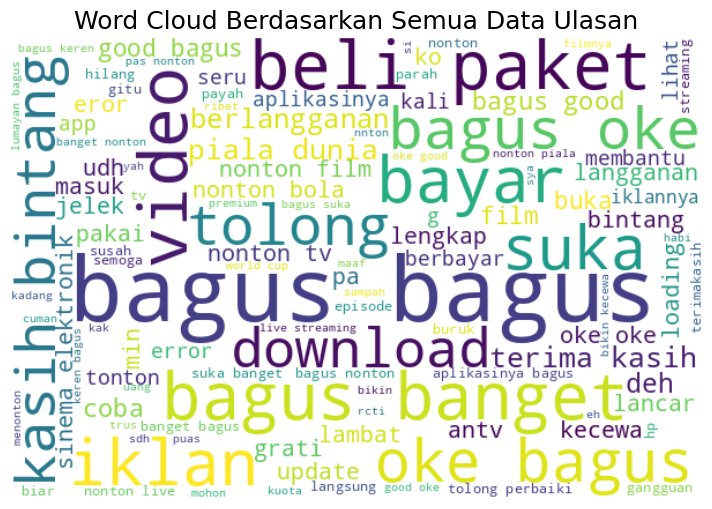

In [ ]:
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'data'.
for tweet in data['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(background_color='white', width=600, height=400, random_state=21, min_font_size=8).generate(list_words)

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))
plt.title('Word Cloud Berdasarkan Semua Data Ulasan', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

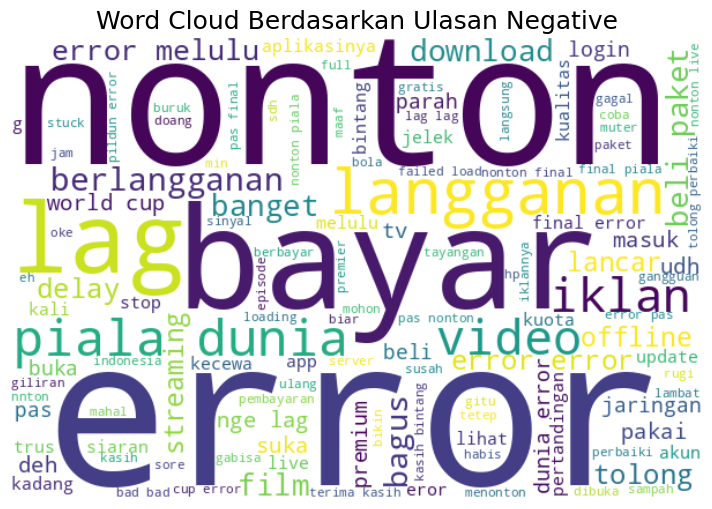

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(background_color='white', width=600, height=400, random_state=21, min_font_size=8).generate(list_words)

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))
plt.title('Word Cloud Berdasarkan Ulasan Negative', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

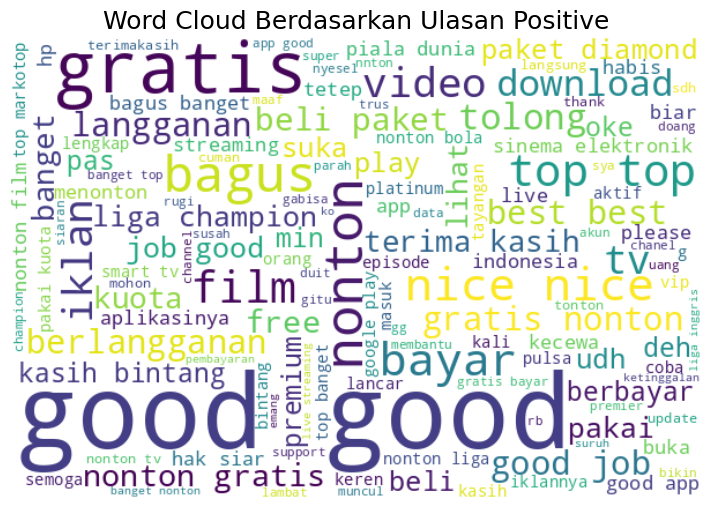

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(background_color='white', width=600, height=400, random_state=21, min_font_size=8).generate(list_words)

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))
plt.title('Word Cloud Berdasarkan Ulasan Positive', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

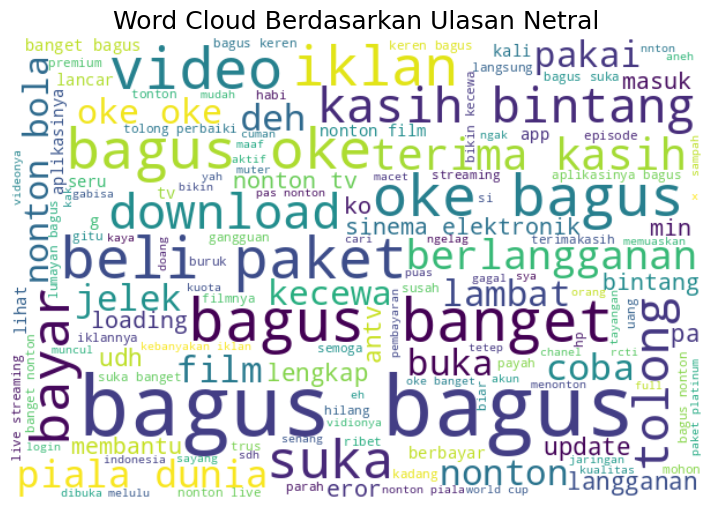

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks netral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'netral_tweets'.
for tweet in netral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(background_color='white', width=600, height=400, random_state=21, min_font_size=8).generate(list_words)

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))
plt.title('Word Cloud Berdasarkan Ulasan Netral', fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

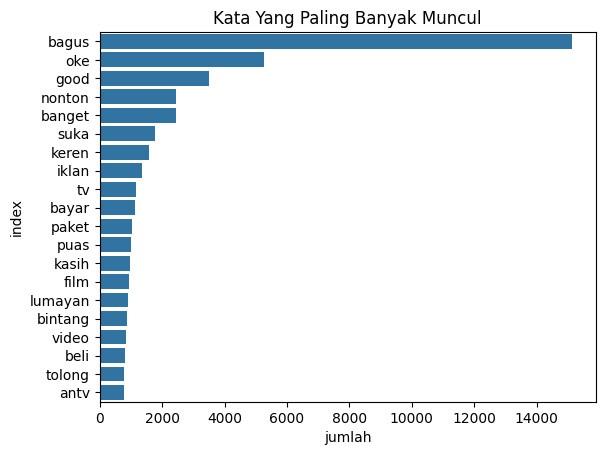

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata Yang Paling Banyak Muncul')
plt.show()

# Pengembangan Model ML

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = data['text_akhir']
y = data['Sentiment']

## Menggunakan TF-IDF

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,acara,aktif,akun,aneh,antv,apl,aplikasinya,app,asik,bagus,...,ulang,update,video,videonya,vidionya,voucher,wifi,world,yah,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.103435,...,0.0,0.0,0.190642,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.177535,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464823,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
107860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.334002,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
107861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.430450,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
107862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0


# Percobaan 1: Test Size 0.1

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Membuat objek model Naive Bayes (Multinomial Naive Bayes)
naive_bayes_ts1 = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_ts1.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes_ts1.predict(X_train.toarray())
y_pred_test_nb = naive_bayes_ts1.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.9577654851303604
Naive Bayes - accuracy_test: 0.9552238805970149


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest_ts1 = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_ts1.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest_ts1.predict(X_train.toarray())
y_pred_test_rf = random_forest_ts1.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9831680006592705
Random Forest - accuracy_test: 0.9599517938259016


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_ts1 = LogisticRegression(max_iter=500)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_ts1.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression_ts1.predict(X_train.toarray())
y_pred_test_lr = logistic_regression_ts1.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9621434531351402
Logistic Regression - accuracy_test: 0.959859089644943


# Percobaan 2: Test Size 0.2

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Membuat objek model Naive Bayes (Multinomial Naive Bayes)
naive_bayes_ts2 = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_ts2.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes_ts2.predict(X_train.toarray())
y_pred_test_nb = naive_bayes_ts2.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb_ts2 = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb_ts2 = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb_ts2)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_ts2)

Naive Bayes - accuracy_train: 0.9573420171280899
Naive Bayes - accuracy_test: 0.957632225467019


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest_ts2 = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_ts2.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest_ts2.predict(X_train.toarray())
y_pred_test_rf = random_forest_ts2.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_ts2 = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf_ts2 = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf_ts2)
print('Random Forest - accuracy_test:', accuracy_test_rf_ts2)

Random Forest - accuracy_train: 0.9830805066577047
Random Forest - accuracy_test: 0.9621749408983451


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_ts2 = LogisticRegression(max_iter=500)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_ts2.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression_ts2.predict(X_train.toarray())
y_pred_test_lr = logistic_regression_ts2.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr_ts2 = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr_ts2 = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_ts2)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_ts2)

Logistic Regression - accuracy_train: 0.9618731965094853
Logistic Regression - accuracy_test: 0.9619895239419645


# Percobaan 3: Test Size 0.3

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Membuat objek model Naive Bayes (Multinomial Naive Bayes)
naive_bayes_ts3 = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_ts3.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes_ts3.predict(X_train.toarray())
y_pred_test_nb = naive_bayes_ts3.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb_ts3 = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb_ts3 = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb_ts3)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_ts3)

Naive Bayes - accuracy_train: 0.9575254291163382
Naive Bayes - accuracy_test: 0.9565822002472187


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest_ts3 = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_ts3.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest_ts3.predict(X_train.toarray())
y_pred_test_rf = random_forest_ts3.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_ts3 = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf_ts3 = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf_ts3)
print('Random Forest - accuracy_test:', accuracy_test_rf_ts3)

Random Forest - accuracy_train: 0.9834180970544607
Random Forest - accuracy_test: 0.961186650185414


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_ts3 = LogisticRegression(max_iter=500)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_ts3.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression_ts3.predict(X_train.toarray())
y_pred_test_lr = logistic_regression_ts3.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr_ts3 = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr_ts3 = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_ts3)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_ts3)

Logistic Regression - accuracy_train: 0.9620947234583598
Logistic Regression - accuracy_test: 0.9611557478368356


# Evaluasi Model Berdasarkan Hasil Test Accuracy (Accuracy >=92)

In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes - Test Size 0.1', 'Random Forest - Test Size 0.1', 'Logistic Regression - Test Size 0.1',
              'Naive Bayes - Test Size 0.2', 'Random Forest - Test Size 0.2', 'Logistic Regression - Test Size 0.2',
              'Naive Bayes - Test Size 0.3', 'Random Forest - Test Size 0.3', 'Logistic Regression - Test Size 0.3'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr,
                       accuracy_train_nb_ts2, accuracy_train_rf_ts2, accuracy_train_lr_ts2,
                       accuracy_train_nb_ts3, accuracy_train_rf_ts3, accuracy_train_lr_ts3],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr,
                      accuracy_test_nb_ts2, accuracy_test_rf_ts2, accuracy_test_lr_ts2,
                      accuracy_test_nb_ts3, accuracy_test_rf_ts3, accuracy_test_lr_ts3]
})
# Menampilkan kolom "Accuracy Train & Accuracy Test"
accuracy_train_test = results_df[['Model', 'Accuracy Train', 'Accuracy Test']]
accuracy_test_sorted = accuracy_train_test.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                                 Model  Accuracy Train  Accuracy Test
4        Random Forest - Test Size 0.2        0.983081       0.962175
5  Logistic Regression - Test Size 0.2        0.961873       0.961990
7        Random Forest - Test Size 0.3        0.983418       0.961187
8  Logistic Regression - Test Size 0.3        0.962095       0.961156
1        Random Forest - Test Size 0.1        0.983168       0.959952
2  Logistic Regression - Test Size 0.1        0.962143       0.959859
3          Naive Bayes - Test Size 0.2        0.957342       0.957632
6          Naive Bayes - Test Size 0.3        0.957525       0.956582
0          Naive Bayes - Test Size 0.1        0.957765       0.955224


# Testing Model

In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = random_forest_ts2.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat tersebut adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat tersebut adalah NEGATIF.")
else:
    print("Sentimen kalimat tersebut adalah NETRAL.")

Masukkan kalimat baru: nonton vidio lancar jaya
Sentimen kalimat tersebut adalah NETRAL.
